In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
from itertools import chain
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline

### Load Orderbook Data

In [3]:
# list(chain(*[('Ask Price {0},Ask Size {0},Bid Price {0},Bid Size {0}'.format(i)).split(',') for i in range(10)]))

In [2]:
price = list(chain(*[('Ask Price {0},Bid Price {0}'.format(i)).split(',') for i in range(10)]))
size = list(chain(*[('Ask Size {0},Bid Size {0}'.format(i)).split(',') for i in range(10)]))
cols = list(chain(*zip(price, size)))

In [3]:
order_data = 'AMZN_2012-06-21_34200000_57600000_orderbook_10.csv'
orders = pd.read_csv(order_data, header=None, names=cols)

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269748 entries, 0 to 269747
Data columns (total 40 columns):
Ask Price 0    269748 non-null int64
Ask Size 0     269748 non-null int64
Bid Price 0    269748 non-null int64
Bid Size 0     269748 non-null int64
Ask Price 1    269748 non-null int64
Ask Size 1     269748 non-null int64
Bid Price 1    269748 non-null int64
Bid Size 1     269748 non-null int64
Ask Price 2    269748 non-null int64
Ask Size 2     269748 non-null int64
Bid Price 2    269748 non-null int64
Bid Size 2     269748 non-null int64
Ask Price 3    269748 non-null int64
Ask Size 3     269748 non-null int64
Bid Price 3    269748 non-null int64
Bid Size 3     269748 non-null int64
Ask Price 4    269748 non-null int64
Ask Size 4     269748 non-null int64
Bid Price 4    269748 non-null int64
Bid Size 4     269748 non-null int64
Ask Price 5    269748 non-null int64
Ask Size 5     269748 non-null int64
Bid Price 5    269748 non-null int64
Bid Size 5     269748 non-null int64
A

In [5]:
orders.head()

,Ask Price 0,Ask Size 0,Bid Price 0,Bid Size 0,Ask Price 1,Ask Size 1,Bid Price 1,Bid Size 1,Ask Price 2,Ask Size 2,...,Bid Price 7,Bid Size 7,Ask Price 8,Ask Size 8,Bid Price 8,Bid Size 8,Ask Price 9,Ask Size 9,Bid Price 9,Bid Size 9
0,2239500,100,2231800,100,2239900,100,2230700,200,2240000,220,...,2202500,5000,2294300,100,2202000,100,2298000,100,2189700,100
1,2239500,100,2238100,21,2239900,100,2231800,100,2240000,220,...,2204000,100,2294300,100,2202500,5000,2298000,100,2202000,100
2,2239500,100,2238100,21,2239600,20,2231800,100,2239900,100,...,2204000,100,2267700,100,2202500,5000,2294300,100,2202000,100
3,2239500,100,2238100,21,2239600,20,2237500,100,2239900,100,...,2213000,4000,2267700,100,2204000,100,2294300,100,2202500,5000
4,2239500,100,2238100,21,2239600,20,2237500,100,2239900,100,...,2213000,4000,2267700,100,2204000,100,2294300,100,2202500,5000


### Message Data

Message Type Codes:

    1: Submission of a new limit order
    2: Cancellation (Partial deletion 
       of a limit order)
    3: Deletion (Total deletion of a limit order)
    4: Execution of a visible limit order			   	 
    5: Execution of a hidden limit order
    7: Trading halt indicator 				   
       (Detailed information below)

In [6]:
types = {1: 'submission',
         2: 'cancellation',
         3: 'deletion',
         4: 'execution_visible',
         5: 'execution_hidden',
         7: 'trading_halt'}

In [7]:
trading_date = '2012-06-21'
levels = 10

In [8]:
message_data = 'AMZN_{}_34200000_57600000_message_{}.csv'.format(trading_date, levels)
messages = pd.read_csv(message_data, header=None, names=['time', 'type', 'order_id', 'size', 'price', 'direction'])
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269748 entries, 0 to 269747
Data columns (total 6 columns):
time         269748 non-null float64
type         269748 non-null int64
order_id     269748 non-null int64
size         269748 non-null int64
price        269748 non-null int64
direction    269748 non-null int64
dtypes: float64(1), int64(5)
memory usage: 12.3 MB


In [9]:
messages.head()

,time,type,order_id,size,price,direction
0,34200.017460,5,0,1,2238200,-1
1,34200.189608,1,11885113,21,2238100,1
2,34200.189608,1,3911376,20,2239600,-1
3,34200.189608,1,11534792,100,2237500,1
4,34200.189608,1,1365373,13,2240000,-1


In [10]:
messages.type.map(types).value_counts()

submission           131954
deletion             123458
execution_visible      8974
cancellation           2917
execution_hidden       2445
Name: type, dtype: int64

In [62]:
messages.time = pd.to_timedelta(messages.time, unit='s')
messages['trading_date'] = pd.to_datetime(trading_date)
messages.time = messages.trading_date.add(messages.time)
messages.drop('trading_date', axis=1, inplace=True)
messages.head()

,time,type,order_id,size,price,direction
0,2012-06-21 09:30:00.017460,5,0,1,2238200,-1
1,2012-06-21 09:30:00.189608,1,11885113,21,2238100,1
2,2012-06-21 09:30:00.189608,1,3911376,20,2239600,-1
3,2012-06-21 09:30:00.189608,1,11534792,100,2237500,1
4,2012-06-21 09:30:00.189608,1,1365373,13,2240000,-1


In [74]:
data = pd.concat([messages, orders], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269748 entries, 0 to 269747
Data columns (total 46 columns):
time           269748 non-null datetime64[ns]
type           269748 non-null int64
order_id       269748 non-null int64
size           269748 non-null int64
price          269748 non-null int64
direction      269748 non-null int64
Ask Price 0    269748 non-null int64
Ask Size 0     269748 non-null int64
Bid Price 0    269748 non-null int64
Bid Size 0     269748 non-null int64
Ask Price 1    269748 non-null int64
Ask Size 1     269748 non-null int64
Bid Price 1    269748 non-null int64
Bid Size 1     269748 non-null int64
Ask Price 2    269748 non-null int64
Ask Size 2     269748 non-null int64
Bid Price 2    269748 non-null int64
Bid Size 2     269748 non-null int64
Ask Price 3    269748 non-null int64
Ask Size 3     269748 non-null int64
Bid Price 3    269748 non-null int64
Bid Size 3     269748 non-null int64
Ask Price 4    269748 non-null int64
Ask Size 4     269748 non-nul

In [97]:
ex = data[data.type.isin([4, 5])]

In [99]:
ex.head()

,time,type,order_id,size,price,direction,Ask Price 0,Ask Size 0,Bid Price 0,Bid Size 0,...,Bid Price 7,Bid Size 7,Ask Price 8,Ask Size 8,Bid Price 8,Bid Size 8,Ask Price 9,Ask Size 9,Bid Price 9,Bid Size 9
0,2012-06-21 09:30:00.017460,5,0,1,2238200,-1,2239500,100,2231800,100,...,2202500,5000,2294300,100,2202000,100,2298000,100,2189700,100
32,2012-06-21 09:30:00.190226,4,11885113,21,2238100,1,2239500,100,2237500,100,...,2230400,100,2244900,100,2230000,10,2245000,5,2226200,100
33,2012-06-21 09:30:00.190226,4,11534792,26,2237500,1,2239500,100,2237500,74,...,2230400,100,2244900,100,2230000,10,2245000,5,2226200,100
37,2012-06-21 09:30:00.372780,5,0,100,2238400,-1,2239500,100,2237500,74,...,2226200,100,2244900,100,2213000,4000,2245000,5,2204000,100
38,2012-06-21 09:30:00.375671,5,0,100,2238400,-1,2239500,100,2237500,74,...,2226200,100,2244900,100,2213000,4000,2245000,5,2204000,100


In [ ]:
cmaps = {'Bid': 'Blues','Ask': 'Reds'}

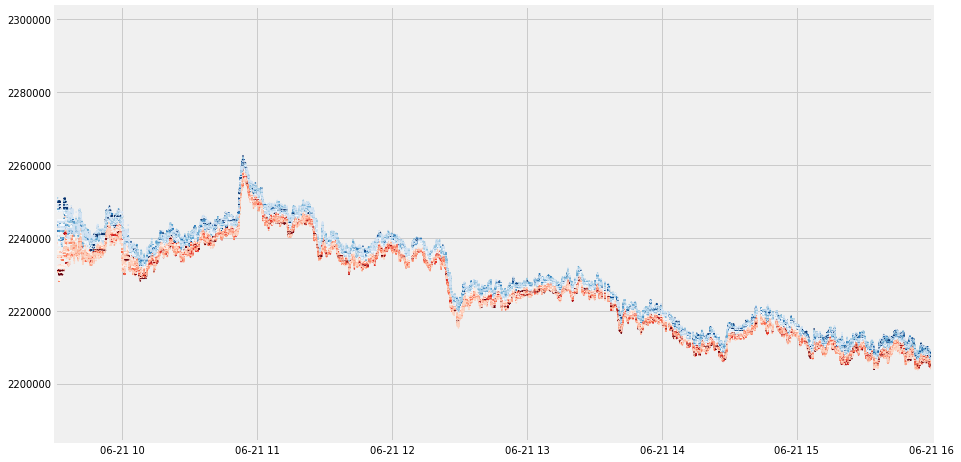

In [121]:
fig, ax=plt.subplots(figsize=(14, 8))
time = ex['time'].dt.to_pydatetime()
for i in range(10):
    for t in ['Bid', 'Ask']:
        y, c = ex['{} Price {}'.format(t, i)], ex['{} Size {}'.format(t, i)]
        ax.scatter(x=time, y=y, c=c, cmap=cmaps[t], s=1, vmin=1, vmax=c.quantile(.95))
ax.set_xlim(datetime(2012, 6, 21, 9, 30), datetime(2012, 6, 21, 16, 0));

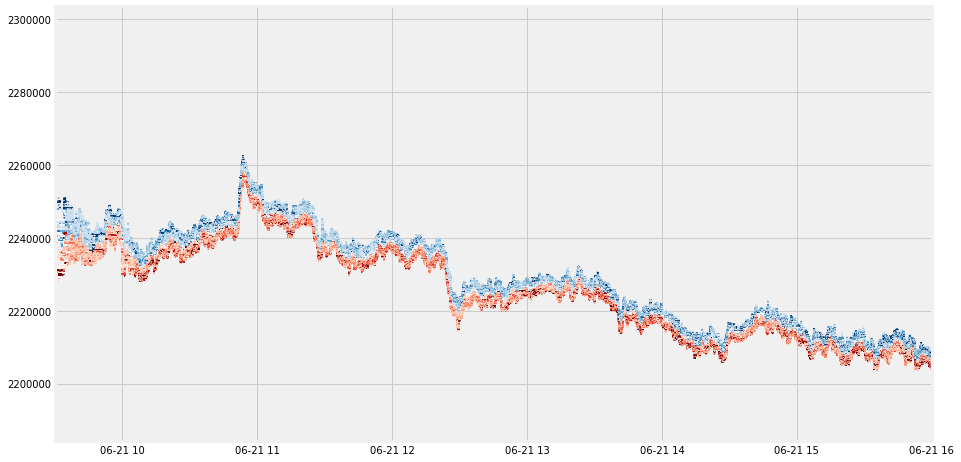

In [122]:
fig, ax=plt.subplots(figsize=(14, 8))
time = data['time'].dt.to_pydatetime()
for i in range(10):
    for t in ['Bid', 'Ask']:
        y, c = data['{} Price {}'.format(t, i)], data['{} Size {}'.format(t, i)]
        ax.scatter(x=time, y=y, c=c, cmap=cmaps[t], s=1, vmin=1, vmax=c.quantile(.95))
ax.set_xlim(datetime(2012, 6, 21, 9, 30), datetime(2012, 6, 21, 16, 0));